# Report 형식으로 만들기

In [7]:
library(tidyverse)
library(ggpubr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
df <- read_csv("../output//NSCLC_EMTAB6149.csv")
head(df)

New names:
• `` -> `...1`
Rows: 40218 Columns: 19
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Cell, Celltype (malignancy), Celltype (major-lineage), Celltype (m...
dbl (11): ...1, UMAP_1, UMAP_2, Cluster, TIGIT, HLA-G, CD226, PVR, LILRB2, L...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Cell,UMAP_1,UMAP_2,Celltype (malignancy),Celltype (major-lineage),Celltype (minor-lineage),Celltype (original),Cluster,DbCluster,Source,Stage,TIGIT,HLA-G,CD226,PVR,LILRB2,LILRB1,LILRB4
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AGTTCTACGCATAC_1,1.842451,-16.59187,Others,Alveolar,Alveolar,Alveolar,13,Alveolar,Tumor,Primary,0,0,0,0,0,0,0
2,ATACCGGATCGTGA_1,1.753730,-16.29929,Others,Alveolar,Alveolar,Alveolar,13,Alveolar,Tumor,Primary,0,0,0,0,0,0,0
3,GAACGTTGATGGTC_1,1.481534,-15.80473,Others,Alveolar,Alveolar,Alveolar,13,Alveolar,Tumor,Primary,0,0,0,0,0,0,0
4,GCACGGTGTAACCG_1,3.887330,-14.12924,Others,Alveolar,Alveolar,Alveolar,13,Alveolar,Tumor,Primary,0,0,0,0,0,0,0
5,TCAGACGAGCAAGG_1,1.627641,-16.31171,Others,Alveolar,Alveolar,Alveolar,13,Alveolar,Tumor,Primary,0,0,0,0,0,0,0
6,GCGCACGACAGATC_3,-7.192630,-15.41526,Others,Alveolar,Alveolar,Malignant,13,Malignant,Tumor,Primary,0,0,0,0,0,0,0


In [9]:
df %>% rename(.,
              malignancy = "Celltype (malignancy)",
              major_lineage = "Celltype (major-lineage)",
              minor_lineage = "Celltype (minor-lineage)",
              original = "Celltype (original)",
             ) -> df

In [11]:
unique(df$minor_lineage)

[1] "Alveolar"    "B"           "CD4Tn"       "Th17"        "CD8Tem"     
 [6] "CD8Tex"      "Endothelial" "Fibroblasts" "Malignant"   "Mast"       
[11] "Monocyte"    "M1"          "M2"          "Plasma"      "Treg"

In [59]:
colnames(df)

[1] "...1"          "Cell"          "UMAP_1"        "UMAP_2"       
 [5] "malignancy"    "major_lineage" "minor_lineage" "original"     
 [9] "Cluster"       "DbCluster"     "Source"        "Stage"        
[13] "TIGIT"         "HLA-G"         "CD226"         "PVR"          
[17] "LILRB2"        "LILRB1"        "LILRB4"

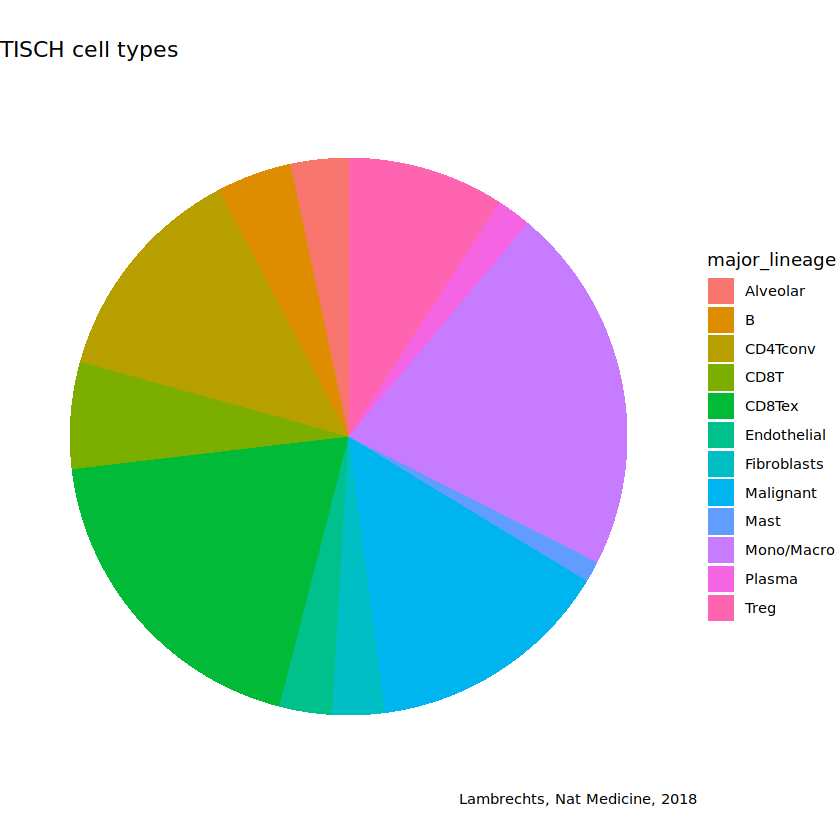

In [60]:
data <- df %>% group_by(major_lineage) %>% summarise(n = n()) 

ggplot(data, aes(x="", y=n, fill=major_lineage)) + geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) + 
  theme(axis.text = element_blank(),axis.ticks = element_blank(), panel.grid  = element_blank()) +
  theme_void() + 
  labs(title = "TISCH cell types", subtitle = "", caption = "Lambrechts, Nat Medicine, 2018")

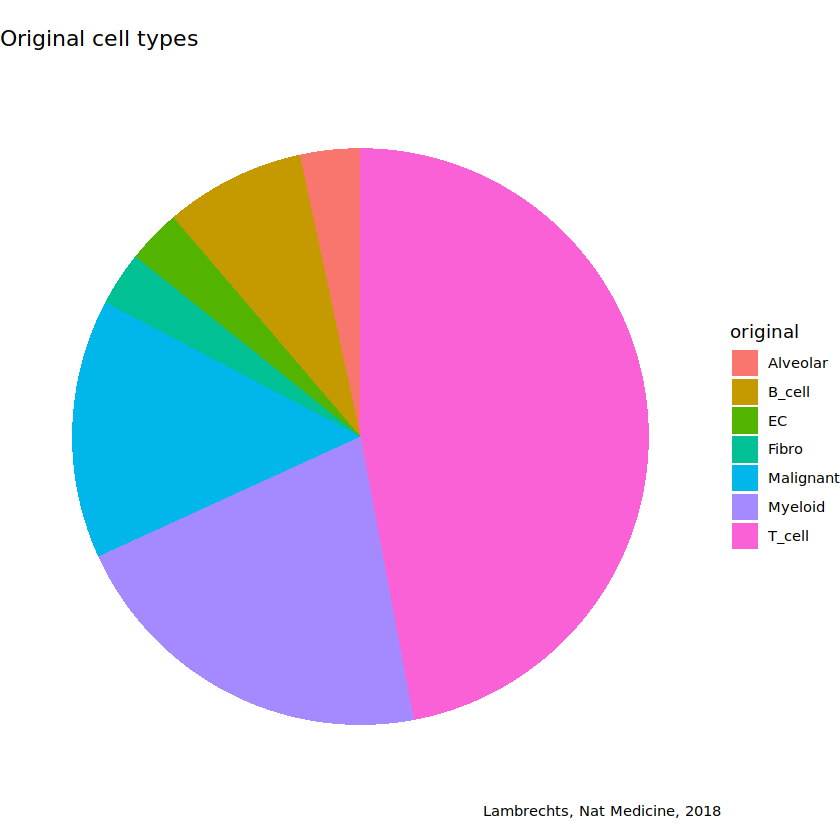

In [61]:
data <- df %>% group_by(original) %>% summarise(n = n()) 

ggplot(data, aes(x="", y=n, fill=original)) + geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) + 
  theme(axis.text = element_blank(),axis.ticks = element_blank(), panel.grid  = element_blank()) +
  theme_void() + 
  labs(title = "Original cell types", subtitle = "", caption = "Lambrechts, Nat Medicine, 2018")

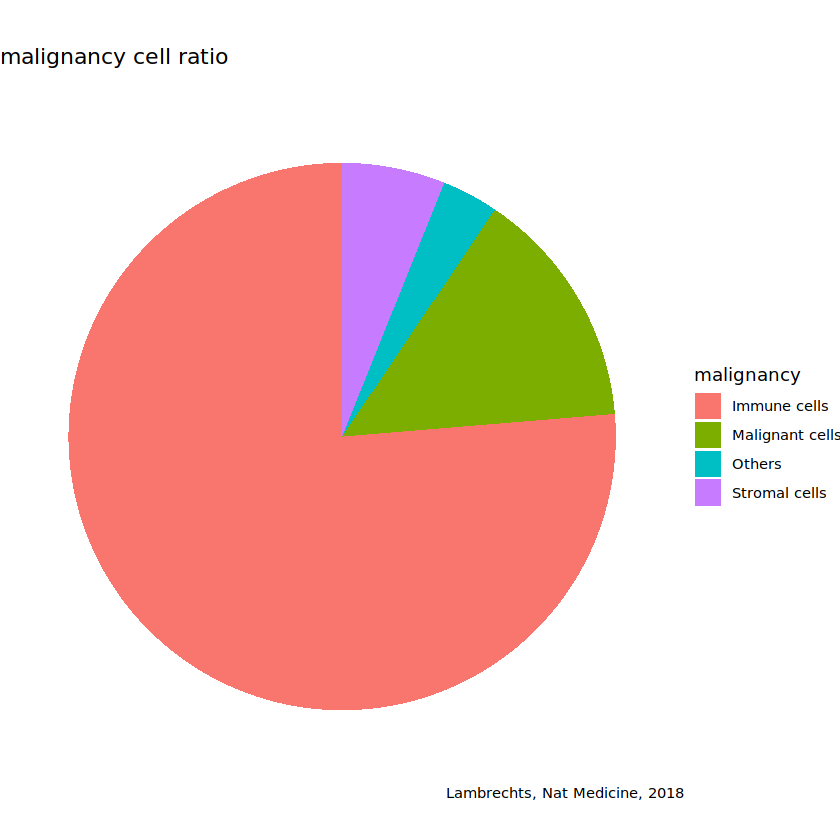

In [62]:
data <- df %>% group_by(malignancy) %>% summarise(n = n()) 

ggplot(data, aes(x="", y=n, fill=malignancy)) + geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) + 
  theme(axis.text = element_blank(),axis.ticks = element_blank(), panel.grid  = element_blank()) +
  theme_void() + 
  labs(title = "malignancy cell ratio", subtitle = "", caption = "Lambrechts, Nat Medicine, 2018")

# Scatter plot 그리기

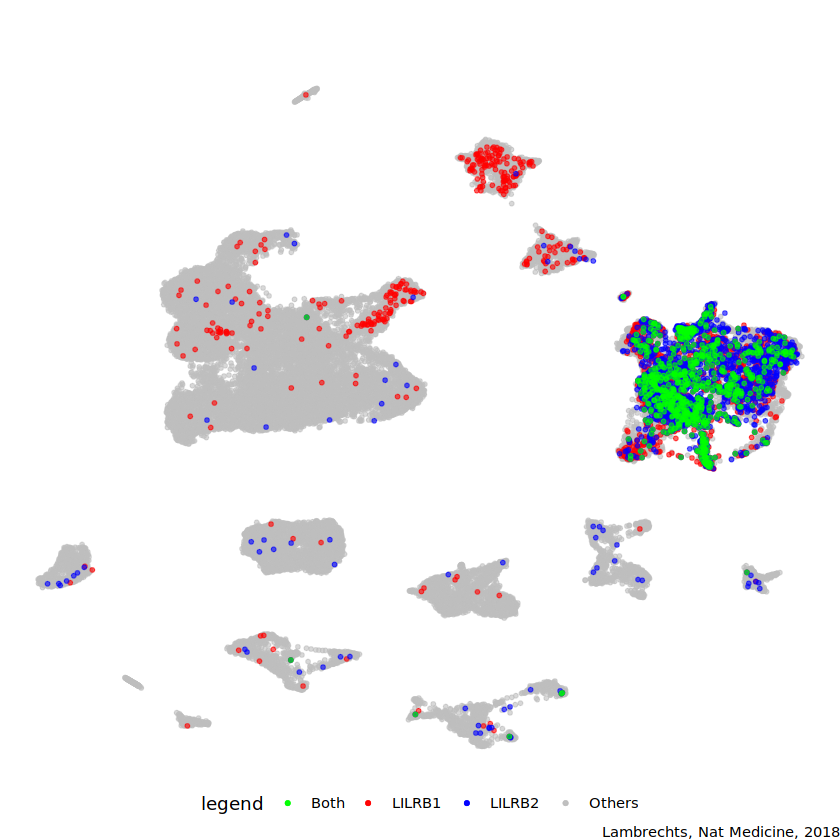

In [13]:
data_other <- df %>% filter(LILRB1==0, LILRB2==0) 
data_1 <- df %>% filter(LILRB1>0)
data_2 <- df %>% filter(LILRB2>0)
data_3 <- df %>% filter(LILRB1>0 & LILRB2>0)
cols <- c("Others"="grey","LILRB1"="red","LILRB2"="blue", "Both"="green")

ggplot() + 
  geom_point(data_other, mapping=aes(x=UMAP_1, y=UMAP_2, color = 'Others',), size=1, alpha = 0.6) +
  geom_point(data_1, mapping=aes(x=UMAP_1, y=UMAP_2, color = 'LILRB1'), size=1, alpha = 0.6) +
  geom_point(data_2, mapping=aes(x=UMAP_1, y=UMAP_2, color = 'LILRB2'), size=1, alpha = 0.6) +
  geom_point(data_3, mapping=aes(x=UMAP_1, y=UMAP_2, color = 'Both'), size=1, alpha = 0.6) +  ylab("") + xlab("") + theme_void() +
  scale_color_manual(name="legend", values=cols) + theme(legend.position = "bottom") +
  labs(title = "", subtitle = "", caption = "Lambrechts, Nat Medicine, 2018")

In [14]:
data_3  %>% group_by(minor_lineage) %>% summarise(n = n())

minor_lineage,n
<chr>,<int>
Alveolar,3
B,1
CD8Tem,1
Endothelial,2
Fibroblasts,2
M1,165
M2,371
Malignant,1
Mast,2
